<a href="https://colab.research.google.com/github/LCCLS/Subjectivity_Mining_Assignment3/blob/main/SM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 15.0 MB/s 
     |████████████████████████████████| 7.6 MB 43.2 MB/s 
     |████████████████████████████████| 163 kB 65.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 250 kB 15.7 MB/s 
     |████████████████████████████████| 1.3 MB 60.2 MB/s 
     |████████████████████████████████| 441 kB 66.8 MB/s 
     |████████████████████████████████| 1.9 MB 55.7 MB/s 
     |████████████████████████████████| 9.2 MB 56.3 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 162 kB 58.9 MB/s 
     |████████████████████████████████| 182 kB 68.4 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 162 kB 67.8 MB/s 
     |████████████████████████████████| 158 kB 72.5 

In [25]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
from google.colab import drive
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# drive.mount('/content/drive')

In [3]:
train = pd.read_csv('/content/olid-train-small.csv')
test = pd.read_csv('/content/olid-test.csv')

train2 = pd.read_csv('/content/hasoc-train.csv')
test2 = pd.read_csv('/content/olid-test.csv')

In-Domain and Cross-Domain setup for BERT

In [26]:
model_args = ClassificationArgs()
model_args.overwrite_output_dir = True

model = ClassificationModel(model_type='bert', model_name='bert-base-cased', 
                            use_cuda=True, num_labels=2, args=model_args)
model2 = ClassificationModel(model_type='bert', model_name='bert-base-cased', 
                             use_cuda=True, num_labels=2, args=model_args)

model.train_model(train, output_dir = 'bert_in_domain')
model2.train_model(train2, output_dir='bert_cross_domain')

test_sent = test['text'].to_list()

bert_predictions = model.predict(test_sent)
bert_hasoc_predictions = model2.predict(test_sent)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/732 [00:00<?, ?it/s]

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/732 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

In-Domain and Cross-Domain setup for RoBERTa

In [16]:
model_args = ClassificationArgs()
model_args.overwrite_output_dir = True

model3 = ClassificationModel(model_type='roberta', model_name='roberta-base', use_cuda=True, num_labels=2, args=model_args))
model4 = ClassificationModel(model_type='roberta', model_name='roberta-base', use_cuda=True, num_labels=2, args=model_args))

model3.train_model(train, output_dir='roberta_in_domain')
model4.train_model(train2, output_dir='roberta_cross_domain')

test_sent = test['text'].to_list()

roberta_predictions = model3.predict(test_sent)
roberta_hasoc_predictions = model4.predict(test_sent)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/732 [00:00<?, ?it/s]

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/732 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

In [20]:
def classification_metrics(gold, predictions):

    tp, fp, tn, fn = 0,0,0,0
    for a,b in enumerate(gold_labels):
      if gold_labels[a] == 1 and pred_labels1[a] == 1:
        tp += 1
      elif gold_labels[a] == 0 and pred_labels1[a] == 1:
        fp += 1
      elif gold_labels[a] == 0 and pred_labels1[a] == 0:
        tn += 1
      elif gold_labels[a] == 1 and pred_labels1[a] == 0:
        fn += 1

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * ((precision * recall)/(precision + recall))

    print('True Positives: {}\nTrue Negatives: {}\nFalse Positives: {}\nFalse Negatives: {}'.format(tp,tn,fp,fn))

    print(f'Accuracy: {round(accuracy,2)}\nPrecision: {round(precision,2)}\nRecall: {round(recall, 2)}\nF1 Score: {round(f1,2)}')

    print(f'\n Confusion Matrix: \n{confusion_matrix(gold, predictions)}')

Calculating BERT INDOMAIN classification metrics and saving information to a file 

---




---



In [28]:
gold_labels = test['labels'].to_list()
bert_olid_labels = bert_predictions[0]
classification_metrics(gold_labels, bert_olid_labels)

metrics_bert_olid = classification_report(gold_labels, bert_olid_labels, output_dict=True)
df = pd.DataFrame(metrics_bert_olid).transpose()
df.to_csv('/content/classification_reports/BERT_OLID_INDOMAIN.csv')

True Positives: 162
True Negatives: 558
False Positives: 62
False Negatives: 78
Accuracy: 0.84
Precision: 0.72
Recall: 0.68
F1 Score: 0.7

 Confusion Matrix: 
[[562  58]
 [ 85 155]]


Calculating BERT CROSSDOMAIN classification metrics and saving information to a file 

---




---






In [30]:
gold_labels = test['labels'].to_list()
bert_hsc_labels = bert_hasoc_predictions[0]
classification_metrics(gold_labels, bert_hsc_labels)

metrics_bert_hsc = classification_report(gold_labels, bert_hsc_labels, output_dict=True)
df = pd.DataFrame(metrics_bert_olid).transpose()
df.to_csv('/content/classification_reports/BERT_HSC_CROSSDOMAIN.csv')

True Positives: 162
True Negatives: 558
False Positives: 62
False Negatives: 78
Accuracy: 0.84
Precision: 0.72
Recall: 0.68
F1 Score: 0.7

 Confusion Matrix: 
[[572  48]
 [129 111]]


Calculating ROBERTA INDOMAIN classification metrics and saving information to a file 

---




---


In [31]:
gold_labels = test['labels'].to_list()
roberta_olid_labels = roberta_predictions[0].tolist()
classification_metrics(gold_labels, roberta_olid_labels)

metrics_bert_olid = classification_report(gold_labels, roberta_olid_labels, output_dict=True)
df = pd.DataFrame(metrics_bert_olid).transpose()
df.to_csv('/content/classification_reports/ROBERTA_OLID_INDOMAIN.csv')

True Positives: 162
True Negatives: 558
False Positives: 62
False Negatives: 78
Accuracy: 0.84
Precision: 0.72
Recall: 0.68
F1 Score: 0.7

 Confusion Matrix: 
[[551  69]
 [ 66 174]]


Calculating ROBERTA CROSSDOMAIN classification metrics and saving information to a file 

---




---


In [33]:
gold_labels = test['labels'].to_list()
roberta_hsc_labels = bert_hasoc_predictions[0]
classification_metrics(gold_labels, roberta_hsc_labels)

metrics_bert_hsc = classification_report(gold_labels, roberta_hsc_labels, output_dict=True)
df = pd.DataFrame(metrics_bert_olid).transpose()
df.to_csv('/content/classification_reports/ROBERTA_HSC_CROSSDOMAIN.csv')

True Positives: 162
True Negatives: 558
False Positives: 62
False Negatives: 78
Accuracy: 0.84
Precision: 0.72
Recall: 0.68
F1 Score: 0.7

 Confusion Matrix: 
[[572  48]
 [129 111]]


In [34]:
def plot_confusion_matrix(test_y, sys_y, title_name):
    cf_matrix = confusion_matrix(test_y, sys_y)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = [f"{value}" for value in cf_matrix.flatten()]
    group_percentages = [f"{round(value * 100, 2)}%" for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f"{v1}\n {v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    accuracy = accuracy_score(test_y, sys_y)
    precision = precision_score(test_y, sys_y, average='macro')
    recall = recall_score(test_y, sys_y, average='macro')
    f1score = f1_score(test_y, sys_y, average='macro')

    stats_text = f"\n\nAccuracy={round(accuracy, 3)}\nPrecision={round(precision, 3)}\nRecall={round(recall, 3)}\nF1 " \
                 f"Score={round(f1score, 3)} "
    figsize = plt.rcParams.get('figure.figsize')

    plt.figure(figsize=figsize)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label' + stats_text)
    plt.title(title_name)
    plt.savefig(f'classification_reports/{title_name}.png', bbox_inches="tight")


Plot Confusion matrices and saving them for: 


BERT: In-, and Cross-Domain 

ROBERTA: In-, and Cross-Domain


---




---


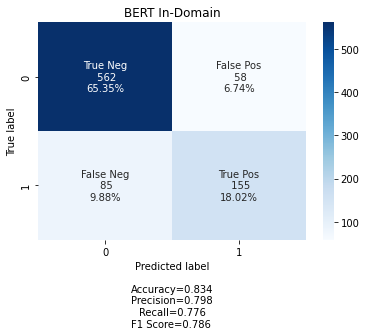

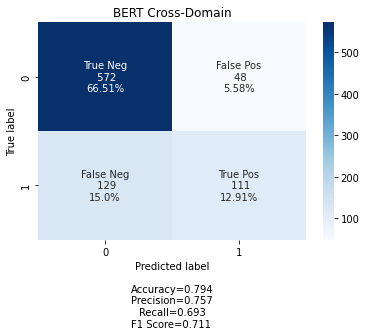

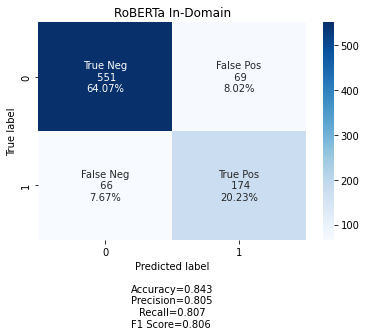

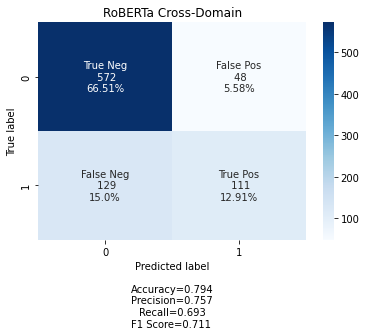

In [35]:
plot_confusion_matrix(gold_labels, bert_olid_labels, title_name="BERT In-Domain")
plot_confusion_matrix(gold_labels, bert_hsc_labels, title_name="BERT Cross-Domain")

plot_confusion_matrix(gold_labels, roberta_olid_labels, title_name="RoBERTa In-Domain")
plot_confusion_matrix(gold_labels, roberta_hsc_labels, title_name="RoBERTa Cross-Domain")